# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import json
import os


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count  (this is a list from citipy)
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Test the code using only 2 cities instead of 600+
#cities = ['Paris', 'London']

In [6]:
url = 'https://openweathermap.org/api'

query_url = url + 'appid=' + weather_api_key + '&q='


# Loop through the list of cities and perform a request for data on each

for x in range(len(cities)):
    print(f'Processing: {x} : {cities[x]}')



#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

#a = requests.get(url)
#response = a.json()
#print(response)

Processing: 0 : busselton
Processing: 1 : faanui
Processing: 2 : wembley
Processing: 3 : okhotsk
Processing: 4 : itarema
Processing: 5 : ilulissat
Processing: 6 : huarmey
Processing: 7 : atar
Processing: 8 : souillac
Processing: 9 : berlevag
Processing: 10 : pevek
Processing: 11 : funtua
Processing: 12 : panguna
Processing: 13 : punta arenas
Processing: 14 : qaqortoq
Processing: 15 : mrakovo
Processing: 16 : marabba
Processing: 17 : mayo
Processing: 18 : tazovskiy
Processing: 19 : illoqqortoormiut
Processing: 20 : castro
Processing: 21 : buin
Processing: 22 : georgetown
Processing: 23 : bredasdorp
Processing: 24 : hithadhoo
Processing: 25 : east london
Processing: 26 : barentsburg
Processing: 27 : tuktoyaktuk
Processing: 28 : arkhangelsk
Processing: 29 : bluff
Processing: 30 : puerto ayora
Processing: 31 : albany
Processing: 32 : taolanaro
Processing: 33 : samarai
Processing: 34 : benguela
Processing: 35 : mataura
Processing: 36 : san andres
Processing: 37 : rikitea
Processing: 38 : sa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Values needed from api: city name, lat, lng, max temp, humidity, cloudiness, windspeed, country, date

name = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []


#fahr = '&units=imperial'
url_and_api = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key





# Study documentation to see how to make the request
for city in cities:
    
    try:
    
        response = requests.get(f'{url_and_api}&q={city}').json()
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    
    except:
        name.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humid.append(None)
        cloud.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)
        
    continue


In [31]:
w_data = pd.DataFrame({'City':cities, 
                             'Lat':lat,
                             'Lng':lng,
                             'Max Temp':max_temp,
                             'Humidity':humid,
                             'Cloudiness':cloud,
                             'Wind Speed':wind,
                             'Country':country,
                             'Date':date
                            })

w_data.dropna(inplace=True)
w_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,60.01,72.0,26.0,5.99,AU,1.615747e+09
1,faanui,-16.4833,-151.7500,82.65,74.0,100.0,16.13,PF,1.615747e+09
2,wembley,-31.9333,115.8000,69.01,37.0,0.0,17.27,AU,1.615747e+09
3,okhotsk,59.3833,143.3000,1.80,78.0,99.0,9.26,RU,1.615747e+09
4,itarema,-2.9248,-39.9167,83.59,66.0,41.0,12.93,BR,1.615747e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
w_data['Humidity'].max()


100.0

In [10]:
#  Get the indices of cities that have humidity over 100%.
print('There is no humidity over 100%')

There is no humidity over 100%


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

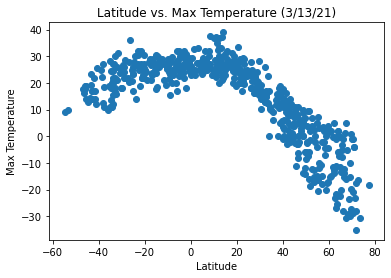

In [12]:
# Plot Data
x = w_data['Lat']
y = w_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature (3/13/21)')
plt.show()

## Latitude vs. Humidity Plot

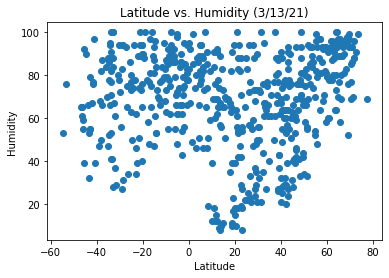

In [13]:
# Plot Data
x = w_data['Lat']
y = w_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (3/13/21)')
plt.show()

## Latitude vs. Cloudiness Plot

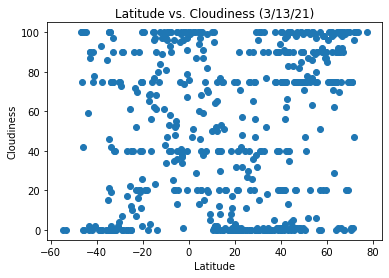

In [14]:
# Plot Data
x = w_data['Lat']
y = w_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (3/13/21)')
plt.show()

## Latitude vs. Wind Speed Plot

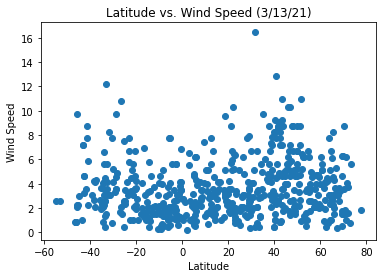

In [15]:
# Plot Data
x = w_data['Lat']
y = w_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (3/13/21)')
plt.show()

## Linear Regression

In [16]:
# split dataframe into northern and southern hemisphere

north_data = w_data.loc[(w_data['Lat']>=0)]
south_data = w_data.loc[(w_data['Lat']<=0)]

north_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,okhotsk,59.3833,143.3000,-17.58,82.0,87.0,4.56,RU,1.615743e+09
5,ilulissat,69.2167,-51.1000,-10.00,52.0,75.0,0.51,GL,1.615743e+09
7,atar,20.5169,-13.0499,33.30,10.0,32.0,3.57,MR,1.615743e+09
9,berlevag,70.8578,29.0864,-4.00,93.0,75.0,1.54,NO,1.615743e+09
10,pevek,69.7008,170.3133,-19.65,97.0,100.0,6.27,RU,1.615743e+09
...,...,...,...,...,...,...,...,...,...
602,vieques,18.4250,-65.8329,28.33,65.0,40.0,5.14,PR,1.615743e+09
603,drovyanaya,51.5833,113.0333,-6.00,33.0,100.0,11.00,RU,1.615743e+09
604,zuwarah,32.9312,12.0820,15.42,61.0,0.0,3.45,LY,1.615743e+09
605,moose factory,51.2585,-80.6094,-16.00,55.0,75.0,8.75,CA,1.615743e+09


In [17]:
south_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,15.56,71.0,19.0,0.45,AU,1.615743e+09
1,faanui,-16.4833,-151.7500,28.01,75.0,56.0,6.94,PF,1.615743e+09
2,wembley,-31.9333,115.8000,21.11,37.0,0.0,8.23,AU,1.615743e+09
4,itarema,-2.9248,-39.9167,29.98,62.0,34.0,5.60,BR,1.615743e+09
6,huarmey,-10.0681,-78.1522,25.52,68.0,43.0,4.09,PE,1.615743e+09
...,...,...,...,...,...,...,...,...,...
579,benjamin constant,-4.3831,-70.0311,30.00,74.0,40.0,2.06,BR,1.615743e+09
587,hervey bay,-25.2986,152.8535,25.00,86.0,61.0,0.45,AU,1.615743e+09
590,puerto baquerizo moreno,-0.9000,-89.6000,28.00,83.0,20.0,4.12,EC,1.615743e+09
596,bealanana,-14.5500,48.7333,18.49,96.0,97.0,0.41,MG,1.615743e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

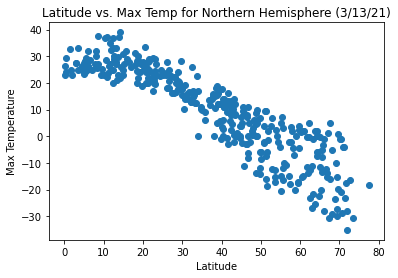

In [18]:
# Plot Data
x = north_data['Lat']
y = north_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temp for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

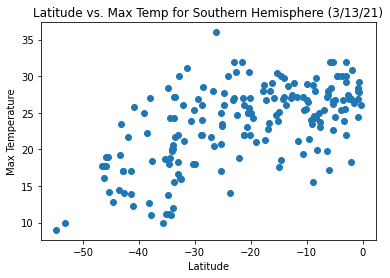

In [19]:
# Plot Data
x = south_data['Lat']
y = south_data['Max Temp']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temp for Southern Hemisphere (3/13/21)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

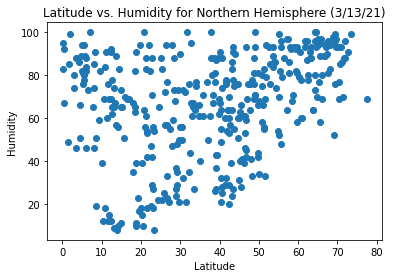

In [20]:
# Plot Data
x = north_data['Lat']
y = north_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

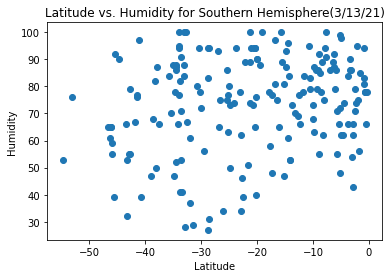

In [21]:
# Plot Data
x = south_data['Lat']
y = south_data['Humidity']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity for Southern Hemisphere(3/13/21)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

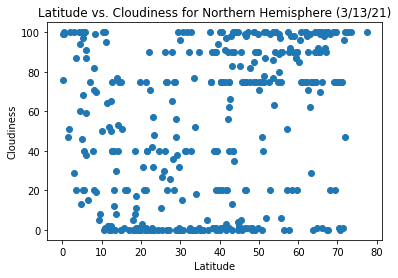

In [22]:
# Plot Data
x = north_data['Lat']
y = north_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

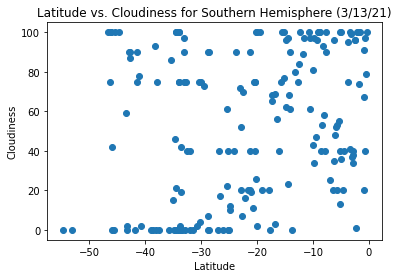

In [23]:
# Plot Data
x = south_data['Lat']
y = south_data['Cloudiness']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness for Southern Hemisphere (3/13/21)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

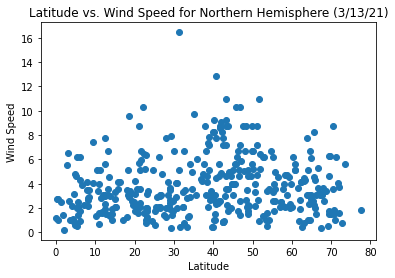

In [24]:
# Plot Data
x = north_data['Lat']
y = north_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed for Northern Hemisphere (3/13/21)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

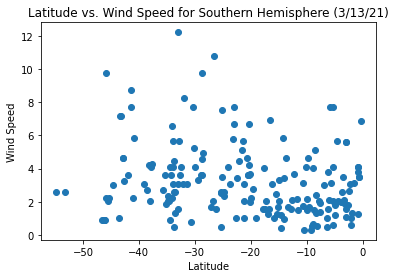

In [25]:
# Plot Data
x = south_data['Lat']
y = south_data['Wind Speed']
plt.scatter(x,y)

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed for Southern Hemisphere (3/13/21)')
plt.show()

In [28]:
# export w_data to csv for VacationPy
w_data.to_csv("output_data/Weather_data.csv", index = False, header = True )